In [1]:
# Importing Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Importing the Dataset
iris=pd.read_csv("D:\\Resolve6_Training\\DS_ML\\Sample Data Sets\\iris.csv")
iris=iris.loc[:,['SepalLengthCm','SepalWidthCm','Species']]
print(iris.head())

   SepalLengthCm  SepalWidthCm      Species
0            5.1           3.5  Iris-setosa
1            4.9           3.0  Iris-setosa
2            4.7           3.2  Iris-setosa
3            4.6           3.1  Iris-setosa
4            5.0           3.6  Iris-setosa


Our aim is to predict the Species of a flower based on its Sepal Length and Width.

In [2]:
X=iris.drop(columns="Species")
y=iris["Species"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=45)

In [3]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=40)
tree.fit(X_train,y_train)
y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

In [7]:
tree.get_depth()

10

In [8]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,y_train_pred),round(accuracy_score(y_test,y_test_pred),2))

0.95 0.63


Please Note: By default, the Decision Tree function doesn’t perform any pruning and allows the tree to grow as much as it can. We get an accuracy score of 0.95 and 0.63 on the train and test part respectively as shown below. We can say that our model is Overfitting i.e. memorizing the train part but is not able to perform equally well on the test part.

In [9]:
path=tree.cost_complexity_pruning_path(X_train,y_train)
alphas=path['ccp_alphas']

print(alphas)

[0.         0.00277778 0.00277778 0.00277778 0.00324074 0.00518519
 0.00555556 0.00694444 0.00743464 0.01006944 0.01041667 0.01161038
 0.01230159 0.01581699 0.02010944 0.05683866 0.06089286 0.20756944]


DecisionTree in sklearn has a function called cost_complexity_pruning_path, which gives the effective alphas of subtrees during pruning and also the corresponding impurities. In other words, we can use these values of alpha to prune our decision tree:

In [10]:
len(alphas)

18

In [191]:
alphas.min(),alphas.max()

(0.0, 0.2075694444444443)

We will set these values of alpha and pass it to the ccp_alpha parameter of our DecisionTreeClassifier. By looping over the alphas array, we will find the accuracy on both Train and Test parts of our dataset.

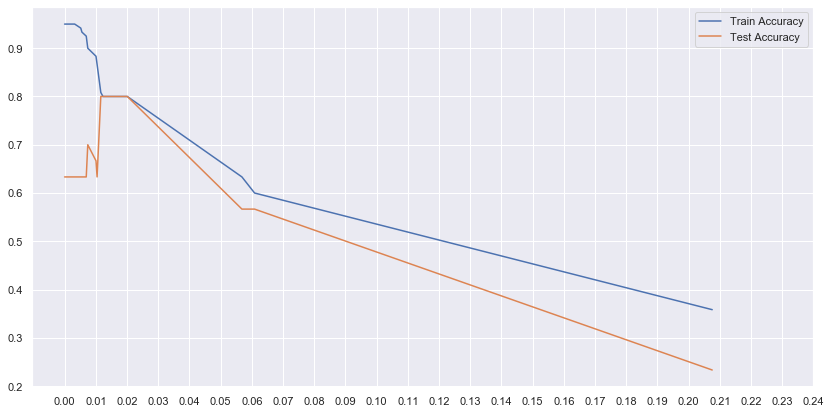

In [10]:
accuracy_train,accuracy_test=[],[]

for i in alphas:
    tree=DecisionTreeClassifier(ccp_alpha=i)
    
    tree.fit(X_train,y_train)
    y_train_pred=tree.predict(X_train)
    y_test_pred=tree.predict(X_test)
    
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
    
    
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

From the above plot, we can see that between alpha=0.01 and 0.02, we get the maximum test accuracy. Although our train accuracy has decreased to 0.8, our model is now more generalized and it will perform better on unseen data.

In [197]:
tree = DecisionTreeClassifier(ccp_alpha=0.02,random_state=40)
tree.fit(X_train,y_train)
y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

print(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred))

0.8 0.8
